In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }</style>'))

In [3]:
import os
import sys
stbl_root_path = os.path.abspath('..')
if stbl_root_path not in sys.path:
    print('inserting the following to path',stbl_root_path)
    sys.path.insert(0,os.path.abspath('..'))
    print(sys.path)

inserting the following to path /home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines
['/home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines', '/home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines/my_colabs', '/opt/anaconda3/envs/tf15/lib/python37.zip', '/opt/anaconda3/envs/tf15/lib/python3.7', '/opt/anaconda3/envs/tf15/lib/python3.7/lib-dynload', '', '/opt/anaconda3/envs/tf15/lib/python3.7/site-packages', '/opt/anaconda3/envs/tf15/lib/python3.7/site-packages/IPython/extensions', '/home/gkoren2/.ipython']


In [4]:
import numpy as np
import tensorflow as tf
import gym
from my_zoo.utils.common import suppress_tensorflow_warnings, set_gpu_device
set_gpu_device('0')
suppress_tensorflow_warnings()
print(tf.__version__)
import matplotlib.pyplot as plt
%matplotlib notebook

1 Physical GPUs, 1 Logical GPU
1.15.0


In [5]:
from stable_baselines.dbcq.dbcq import DBCQ
from stable_baselines.dbcq.expert_dataset import generate_experience_traj,load_experience_traj

# Start experiment here

In [ ]:
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_csv-18-03-2020_10-24-21/1/model_params.zip'
model = DBCQ.load(model_file_name)

In [ ]:
data_file_name =  '/home/gkoren2/share/Data/MLA/stbl/erbufs/L2_data_rnd_RL.npz'
data=np.load(data_file_name,allow_pickle=True)
len(data['actions'])

In [ ]:
Y=data['actions']
X=data['obs']
X.shape

In [ ]:
y_pred=model.predict(X,deterministic=True)

In [ ]:
plt.hist(y_pred[0],bins=4)

## Train on L2_ww31_rnd_mnmxscaled.csv , test on L2_ww31_oracle_mnmxscaled.csv
we'll have to load it from csv

In [6]:
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_ww31_rnd_csv_mnmx-22-03-2020_08-47-57/1/model_params.zip'
model = DBCQ.load(model_file_name)

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [8]:
data_file_name =  '/home/gkoren2/share/Data/MLA/stbl/erbufs/L2_ww31_oracle_mnmxscaled.csv'
data=load_experience_traj(data_file_name)
len(data['actions'])

loading from csv and saving a cache file in /home/gkoren2/share/Data/MLA/stbl/erbufs/L2_ww31_oracle_mnmxscaled.npz


100%|██████████| 2952/2952 [02:12<00:00, 22.23it/s]


401068

In [9]:
Y=data['actions']
X=data['obs']
X.shape

(401068, 7)

<IPython.core.display.Javascript object>


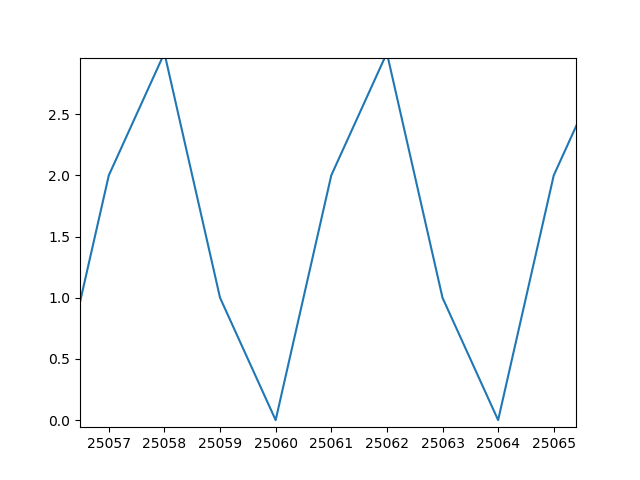

In [15]:
plt.plot(Y)

OK, the oracle's signal looks very artificial. its has a clear cyclic pattern. is that really an oracle ? there's no point in comparing to the oracle - only through the reward

In [16]:
y_pred=model.predict(X,deterministic=True)

<IPython.core.display.Javascript object>


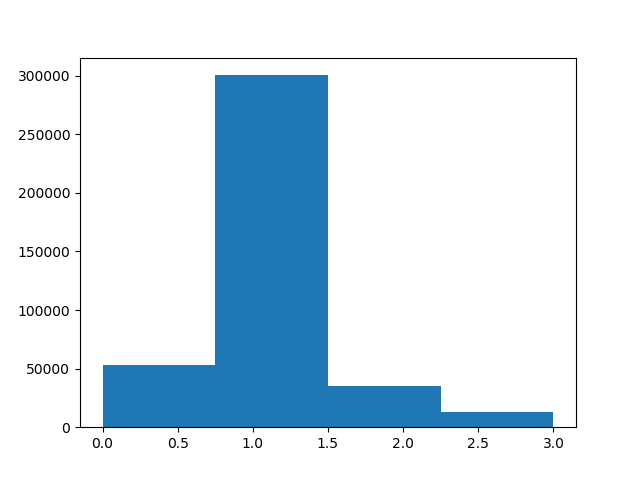

(array([ 52862., 300366.,  34778.,  13062.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

In [19]:
# check accuracy
plt.hist(y_pred[0],bins=4)

## Train on L2_ww31_rnd.csv, test on L2_ww31_oracle.csv

In [20]:
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_ww31_rnd_csv-22-03-2020_08-48-38/1/model_params.zip'
model2 = DBCQ.load(model_file_name)

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [22]:
data_file_name =  '/home/gkoren2/share/Data/MLA/stbl/erbufs/L2_ww31_oracle.csv'
data=load_experience_traj(data_file_name)
len(data['actions'])

loading from csv and saving a cache file in /home/gkoren2/share/Data/MLA/stbl/erbufs/L2_ww31_oracle.npz


100%|██████████| 2952/2952 [02:12<00:00, 22.26it/s]


401068

In [24]:
Y2=data['actions']
X2=data['obs']
X2.shape

(401068, 7)

In [25]:
y2_pred=model2.predict(X2,deterministic=True)

<IPython.core.display.Javascript object>


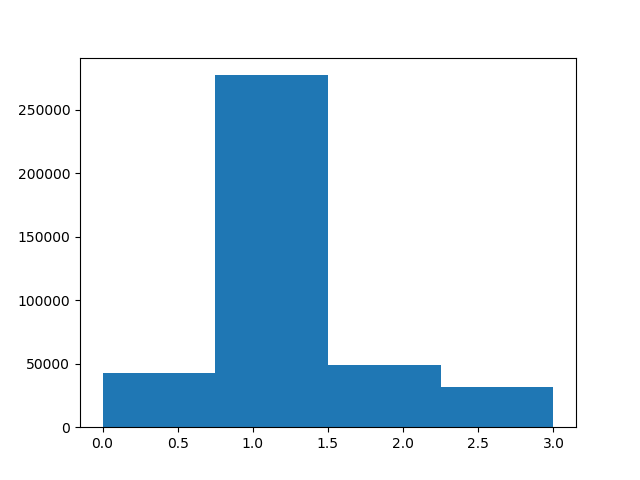

(array([ 43033., 277206.,  49070.,  31759.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

In [27]:
plt.hist(y2_pred[0],bins=4)